In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
# ppr: petals per 1 revolution
# nr: radius resolution
# pr: petal resolution
# np: total number of petals
# pf: How much the ends of the petals tilt up or down
# ol: How open is it? [ inner outer ]

ppr = 12.6
nr = 30
pr = 10
tnp = 140
pf = -1.2
ol = [.11, 1.1]
pt = (1 / ppr) * np.pi * 2
theta = np.linspace(0, (tnp * pt), (tnp * pr + 1))
[R, THETA] = np.meshgrid(np.linspace(0, 1, nr), theta)
R = R.transpose()
THETA = THETA.transpose()

In [3]:
print(f"R.shpae: {R.shape}")
print(f"theta.shpae: {theta.shape}")

R.shpae: (30, 1401)
theta.shpae: (1401,)


In [4]:
x = 1 - (np.abs(1 - np.mod(ppr * THETA, 2 * np.pi) / np.pi) ** 2) ** 7
phi = (np.pi / 2) * np.linspace(ol[0], ol[1], (tnp * pr + 1)) ** 2
y = pf * (R ** 2) * (1.27689 * R - 1) ** 2 * np.sin(phi)
R2 = x * (R * np.sin(phi) + y * np.cos(phi))
X = R2 * np.sin(THETA)
Y = R2 * np.cos(THETA)
Z = x * (R * np.cos(phi) - y * np.sin(phi))
C = np.hypot(np.hypot(X, Y), Z)

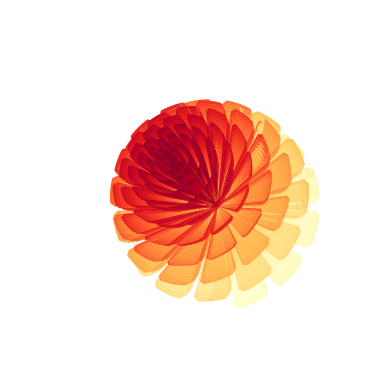

In [5]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap=cm.YlOrRd)
ax.view_init(elev=60, azim=90, roll=45)
plt.axis('off')
plt.grid(b=None)